<a href="https://colab.research.google.com/github/ssuxmin/tmp/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/Final_coding_test_(DL_with_Python)_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# final-term coding test on Deep Learning with Python

- Name:  
- ID Number: 

------------------------------------------

1. 이 노트북을 보인 구글 드라이브에 저장해주세요. 
2. 'Runtime' 탭을 클릭 후, 'Change runtime type' 에서 'Hardware accelerator' 를 'GPU'로 설정해주세요.  
3. 문제를 풀어주세요. 굿럭! :) 


In [1]:
import tensorflow 
tensorflow.keras.__version__

'2.12.0'

## Q1 Use dog-cat data

In [2]:
from tensorflow import keras
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tensorflow.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 [==============================] - 2s 0us/step


In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [4]:
import os
os.listdir(PATH)

['validation', 'vectorize.py', 'train']

(Q1-1) 데이터를 살펴보세요. Train, Validation 데이터에 각각 몇개씩 샘플이 있습니까? 

In [6]:
print("Number of cat samples in training set:", num_cats_tr)
print("Number of dog samples in training set:", num_dogs_tr)
print("Number of cat samples in validation set:", num_cats_val)
print("Number of dog samples in validation set:", num_dogs_val)
print("Total number of samples in training set:", total_train)
print("Total number of samples in validation set:", total_val)

Number of cat samples in training set: 1000
Number of dog samples in training set: 1000
Number of cat samples in validation set: 500
Number of dog samples in validation set: 500
Total number of samples in training set: 2000
Total number of samples in validation set: 1000


(Q1-2) 아래 데이터 파이프라인을 완성하세요.
- Train data 는 PATH 디렉토리 안의 train 디렉토리로부터 가져오세요.
- Vailidation data는 PATH 디렉토리 안의 Vailidation 디렉토리로부터 가져오세요.
- 그림 크기는 (150,150)으로 읽어오세요. 
- batch size 는 64로 설정하세요

In [8]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory
basedir = pathlib.Path("PATH")

train_dataset = image_dataset_from_directory(
train_dir,  # Train 데이터 디렉토리 경로
    shuffle=True,
    batch_size=64,
    image_size=(150,150)
)
validation_dataset = image_dataset_from_directory(
    validation_dir,  # Validation 데이터 디렉토리 경로
    shuffle=False,
    batch_size=64,
    image_size=(150,150)
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)


(Q1-3) 아래와 같이 모형을 만들어보세요.
- 네개의 Conv2D block 을 사용하고, 각각의 필터 갯수는 15, 30, 60, 100 개로 설정. 
- 각각 strides 는 1 zero padding은 적용하지 않음
- MaxPooling2D의 filter는 (2,2)로 설정, stride 는 2
- output layer의 차원은 1 또는 2로 편하게 설정..  (1 로 하든, 2로하든 뒤에 loss를 잘 정의하여 모형이 잘 학습되도록 할 것!)

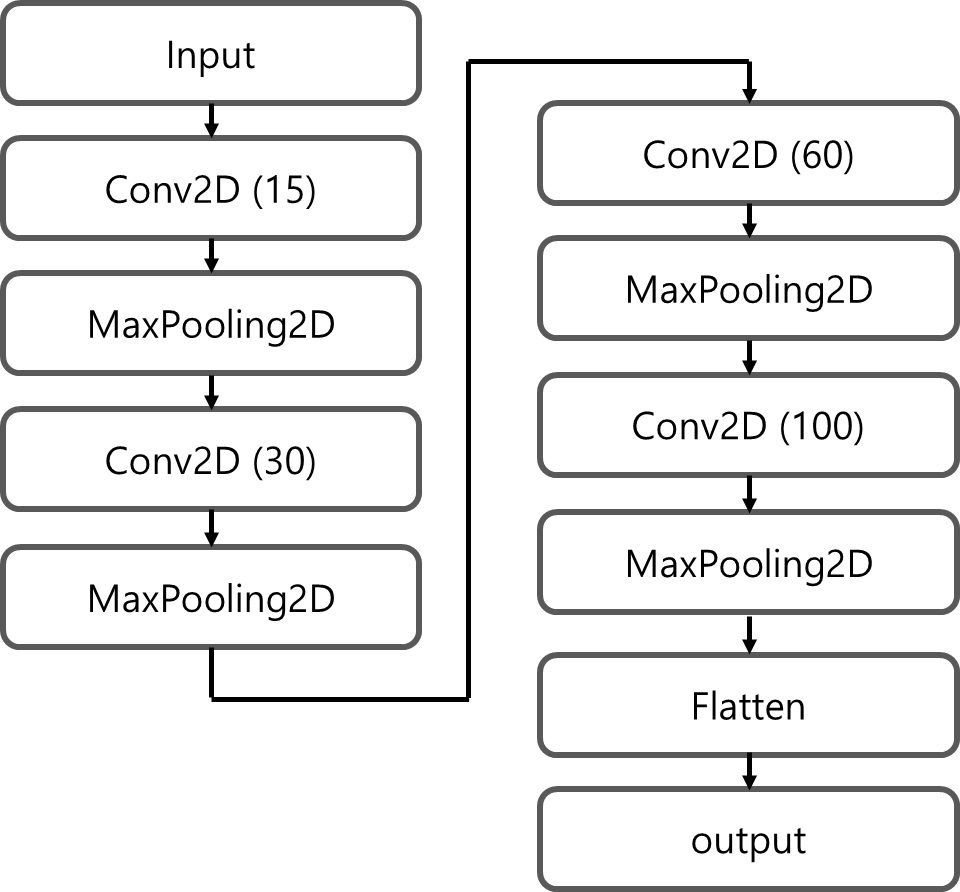

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

### 여기 모형부분을 완성하세요.


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 15)      420       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 74, 74, 15)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 30)        4080      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 36, 36, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 60)        16260     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 17, 17, 60)      

(Q1-4) 아래와 같이 모형을 컴파일하세요.
- loss 는 binary cross entrophy loss 또는 cross entrophy loss를 사용하세요 (앞 모형의 output 차원에 따라 적절하게 정의하세요)
- optimizer 로 rmsprop을 사용하세요.
- metric으로 accuracy를 사용하세요.

In [ ]:
from tensorflow.keras import optimizers

model.compile(
    # 이 부분을 완성하세요
)

(Q1-5) 아래 코드를 완성하여 모형을 학습시키세요. 

- callback 은 validation accuracy 기준으로 가장 성능 좋은 모형을 저장하도록 설정하세요.
- 10 epoch 만 트레이닝해 보세요.

In [ ]:
callbacks = [
## 해당 부분을 완성하세요
]
history = model.fit(
## 해당 부분을 완성하세요
)

(Q1-6) Data augmentation 을 추가로 적용해보세요. 
- RandomFlip으로 좌우, 상하방향 대칭을 추가하세요.
- RandomZoom 을 적당한 파라메터로 추가하세요.

In [ ]:
data_augmentation = keras.Sequential(
    [
## 해당 부분을 완성하세요.
    ]
)

(Q1-7) 앞에서 정의한 모형에서 data augmentation 을 추가로 적용하여 20 epoch 만 학습시켜보고 validation accuracy 기준 가장 좋았던 결과를 알려주세요. 

## Q2 Use Jena climate data

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2022-06-06 08:12:34--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.201.72
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.201.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  --.-KB/s    in 0.1s    

2022-06-06 08:12:34 (89.4 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

전체 데이터 온도변화 시각화.. 

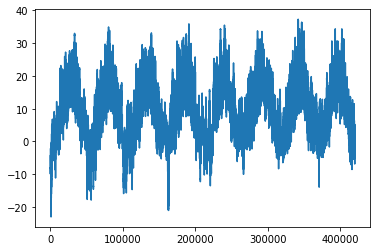

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

(Q2-1) 처음 7 일간 온도를 시각화해보세요. 

Train, valid, test 데이터 나누기

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


학습용 데이터의 평균과 분산을 사용한 표준화

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

(Q2-3) 아래의 코드를 수정해서 데이터 전처리를 진행하세요. 
- Jena데이터는 매 10분마다 기록되었습니다. 매 6개마다 추출하면 한시간당 한개의 샘플을 추출하게 됩니다. 코드를 수정하여 30분 마다 샘플을 추출하도록 해주세요. 
- 최근 3일간의 데이터를 보고 판별을 수행합니다. 
- 예측하고자 하는 시점은 하루 후 입니다. 



In [ ]:
## 아래 ? 들을 완성하세요. 

sampling_rate = #?
sequence_length = #?
delay = #?
batch_size = #?

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [ ]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break

samples shape: (256, 144, 14)
targets shape: (256,)


common sense baseline

In [ ]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


(Q2-4) 아래의 코드를 수정하여 임의의 
- LSTM 모형, 
- bidirectional GRU모형
을 정의해보고 5 epoch 씩만 학습을 진행해보세요.  

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=3,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/3
819/819 [==============================] - 42s 51ms/step - loss: 13.5275 - mae: 2.8512 - val_loss: 13.4187 - val_mae: 2.8989
Epoch 2/3
819/819 [==============================] - 42s 51ms/step - loss: 9.5772 - mae: 2.4362 - val_loss: 11.8028 - val_mae: 2.7173
Epoch 3/3
405/405 [==============================] - 14s 33ms/step - loss: 11.8330 - mae: 2.7059
Test MAE: 2.71


## Q3 ImDB 데이터

In [ ]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  2664k      0  0:00:30  0:00:30 --:--:-- 3154k


In [ ]:
!rm -r aclImdb/train/unsup

하나의 positive text 예제

In [ ]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

Validation 디렉토리를 만들고, 트레이닝 데이터의 0.2% 를 validation 디렉토리로 이동 

In [ ]:
import os, pathlib, shutil, random

base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

train, valid, test 데이터 만들기

In [ ]:
from tensorflow import keras
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [ ]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor(b'"Match Point" and now "Scoop" have both convinced me that not only is Woody Allen doing a neat job making movies in England (and that Scarlett Johansson is the right cast member), but corroborated what I have known for years: he shouldn\'t focus on neurotic rich New Yorkers. In this case, Johansson plays journalism student Sondra Pransky, whom magician Sid Waterman (Allen) puts in his disappearing box, where she meets the ghost of murdered reporter Joe Strombel (Ian McShane), who tells her that the serial killings that have plagued London were committed by millionaire Peter Lyman (Hugh Jackman). So, she gets to know him, and...well, I don\'t know how much I can tell you without giving it away. But I can say that this is probably Allen\'s funniest movie in years. There\'s his ubiquitous unique style of humor (especially the line about his religion).<br /><br />

(Q3-1) bigram Bag of Words 모형을 만들고자 합니다. TextVectorization 클래스를 사용하여, multihot encoding을 통해 학습데이터를 전처리 후 학습을 진행해보고자 합니다. 
- max_tokens 로 상위 15000 개의 자주 사용된 단어들을 이용합니다. 
- 모형은 아래 정의된 모형을 get_model 함수를 통해 불러와주세요.
- callback 없이 5 epoch 만 학습시켜보세요.
- 가장 마지막에 학습된 모형으로 test 데이터에 대한 정확도를 알려주세요. 

In [ ]:
from tensorflow.keras.layers import TextVectorization

from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

(Q3-2) 아래 정의된 TransformerEncoder, PositionalEmbedding 을 이용하여 영화 리뷰에 대한 긍정, 부정 판별모형을 만들어보고자 합니다. 아래 내용들을 고려해 모형을 학습시켜보세요.
- 가장 많이 사용된 15000 개의 단어들을 모형에 고려함
- 최대 문장길이로 550 을 고려함
- 단어를 embedding 시키는 embedding layer의 차원으로는 200을 사용
- multi-head attention 에서 헤드 갯수로 2개를 사용.
- Transformer encoder의 dense layer 차원으로 30 을 사용
- callback 없이 5 epoch 만 학습시켜보고, 가장 마지막에 학습된 모형을 사용하여 test 데이터에 대한 정확도를 구해보세요. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config